<a href="https://colab.research.google.com/github/ShivaniGawande/DLFinalProject_Fall22/blob/main/RNN_LSTM_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np 
import pandas as pd
import seaborn as sns
import gensim
import re, string, unicodedata
from keras_preprocessing.sequence import pad_sequences
from keras.preprocessing import text, sequence
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,GRU, SpatialDropout1D
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from keras.preprocessing.text import Tokenizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
#loading data from google drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#train_file_id = '15NNft0C1CKlKDzjUKbAgibbXTFe8NFgG'
test_file_id = '1J4K-z82tEr4jkwG1Hl1t-eigpcivqt3k' 
'''
download = drive.CreateFile({'id': train_file_id})
download.GetContentFile('train.csv')
train_data  = pd.read_csv("train.csv")
train_data.head()
'''
url = "https://raw.githubusercontent.com/EducationalTestingService/sarcasm/master/twitter/sarcasm_detection_shared_task_twitter_training.jsonl"
url2 ='https://raw.githubusercontent.com/wjq-learning/MSTI/main/datasets/Textual%20target%20labels/train'
df = pd.read_json(url, lines=True)
print(df.head())
     

     label                                           response  \
0  SARCASM  @USER @USER @USER I don't get this .. obviousl...   
1  SARCASM  @USER @USER trying to protest about . Talking ...   
2  SARCASM  @USER @USER @USER He makes an insane about of ...   
3  SARCASM  @USER @USER Meanwhile Trump won't even release...   
4  SARCASM  @USER @USER Pretty Sure the Anti-Lincoln Crowd...   

                                             context  
0  [A minor child deserves privacy and should be ...  
1  [@USER @USER Why is he a loser ? He's just a P...  
2  [Donald J . Trump is guilty as charged . The e...  
3  [Jamie Raskin tanked Doug Collins . Collins lo...  
4  [Man ... y ’ all gone “ both sides ” the apoca...  


In [11]:
df.isna().sum() # Checking for NaN values

label       0
response    0
context     0
dtype: int64

In [12]:
df.head()

,label,response,context
0,SARCASM,@USER @USER @USER I don't get this .. obviousl...,[A minor child deserves privacy and should be ...
1,SARCASM,@USER @USER trying to protest about . Talking ...,[@USER @USER Why is he a loser ? He's just a P...
2,SARCASM,@USER @USER @USER He makes an insane about of ...,[Donald J . Trump is guilty as charged . The e...
3,SARCASM,@USER @USER Meanwhile Trump won't even release...,[Jamie Raskin tanked Doug Collins . Collins lo...
4,SARCASM,@USER @USER Pretty Sure the Anti-Lincoln Crowd...,[Man ... y ’ all gone “ both sides ” the apoca...


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


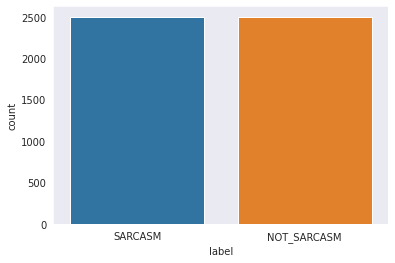

In [13]:
sns.set_style("dark")
sns.countplot(df.label)

In [25]:
for idx,row in df.iterrows():
    row[0] = row[0].replace('rt',' ')
    
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
df2 = df['response'].copy()
#df2['context'] = df['context'].copy()
tokenizer.fit_on_texts(df2.values)
X = tokenizer.texts_to_sequences(df2.values)
X = pad_sequences(X)

In [27]:
Y = pd.get_dummies(df['label']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(3350, 61) (3350, 2)
(1650, 61) (1650, 2)


In [30]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [ ]:
batch_size = 32
history = model.fit(X_train, Y_train, epochs = 25, batch_size=batch_size, verbose = 2)

Epoch 1/25
105/105 - 33s - loss: 0.6403 - accuracy: 0.6275 - 33s/epoch - 317ms/step
Epoch 2/25
105/105 - 30s - loss: 0.4947 - accuracy: 0.7678 - 30s/epoch - 289ms/step
Epoch 3/25
105/105 - 25s - loss: 0.3978 - accuracy: 0.8266 - 25s/epoch - 240ms/step
Epoch 4/25
105/105 - 25s - loss: 0.3196 - accuracy: 0.8624 - 25s/epoch - 235ms/step
Epoch 5/25
105/105 - 24s - loss: 0.2535 - accuracy: 0.8928 - 24s/epoch - 232ms/step
Epoch 6/25


In [ ]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

In [ ]:
# summarize history for accuracy
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_accuracy.png')
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_loss.png')

In [ ]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_validate)):
    
    result = model.predict(X_validate[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1



print("Sarcasm_acc", pos_correct/pos_cnt*100, "%")
print("Non-Sarcasm_acc", neg_correct/neg_cnt*100, "%")

In [ ]:
class Config(object):
    hidden_size = 1024
    num_attention_heads = 16
    attention_probs_dropout_prob = 0.5
    hidden_dropout_prob = 0.5

In [ ]:
transform = [transforms.ToTensor()]
class CustomDataSet(torch.utils.data.TensorDataset):
    def __init__(self, params, x, x_flair, x_c, y, img_id, s_idx, e_idx):
        self.params = params
        self.x = x
        # print(self.x)
        self.x_flair = x_flair

        self.x_c = x_c


        self.y = y
        # print(self.y)
        self.img_id = img_id
        self.s_idx = s_idx
        self.e_idx = e_idx
        self.grid_num = 7
        self.image_size = 608
        self.mean = (123,117,104)
        self.num_of_samples = e_idx - s_idx

    def __len__(self):
        return self.num_of_samples

    def __getitem__(self, idx):
        x = self.x[self.s_idx + idx]
        x_flair = self.x_flair[self.s_idx + idx]
        y = self.y[self.s_idx + idx]
        x_c = self.x_c[self.s_idx + idx]
        img_id = self.img_id[self.s_idx + idx]
        
        img_path = os.path.join(self.params.image_obj_features_dir, img_id + '.jpg')
        img = cv2.imread(img_path)
        ori_img = img
        h, w, _ = ori_img.shape
        size = [h, w]

        img = cv2.imread(img_path)
        img = self.BGR2RGB(img)  # because pytorch pretrained model use RGB
        img = self.subMean(img, self.mean)
        img = cv2.resize(img, (self.image_size, self.image_size))
        for t in transform:
            img = t(img)
        img = np.array(img)

        box_path = os.path.join(self.params.image_obj_boxes_dir, img_id + '.txt')
        box_f = open(box_path, 'r', encoding='utf-8')
        bboxes = []

        for line in box_f.readlines():
            splited = line.strip().split()
            # print(splited)
            num_boxes = len(splited) // 5
            # print(num_boxes)
            for i in range(num_boxes):
                x1 = float(splited[0 + 5 * i]) / w * self.image_size
                y1 = float(splited[1 + 5 * i]) / h * self.image_size
                x2 = float(splited[2 + 5 * i]) / w * self.image_size
                y2 = float(splited[3 + 5 * i]) / h * self.image_size
                c = int(splited[4 + 5 * i])
                # print(i, x1, y1, x2, y2, c)
                # if c != 0:
                #     print(x1, y1, x2, y2, c)
                bboxes.append([x1, y1, x2, y2, 0])

        out_bboxes = np.array(bboxes, dtype=np.float)
        out_bboxes1 = np.zeros([60, 5])
        out_bboxes1[:min(out_bboxes.shape[0], 60)] = out_bboxes[:min(out_bboxes.shape[0], 60)]
        # print(images.shape, out_bboxes1.shape)
        # print(ori_img.shape)
        # print
        # print(bboxes)
        return x, x_flair, y, x_c, img, out_bboxes1, size, bboxes

    def collate(self, batch):
        x = np.array([x[0] for x in batch])
        x_flair = [x[1] for x in batch]
        y = np.array([x[2] for x in batch])
        x_c = np.array([x[3] for x in batch])
        img = np.array([x[4] for x in batch])
        target = np.array([x[5] for x in batch])
        size = np.array([x[6] for x in batch])
        # print(np.array([z[7] for z in batch]).shape)
        # ori_img = np.array([x[7] for x in batch])
        bboxes = np.array([x[7] for x in batch])

        bool_mask = y == 0
        mask = 1 - bool_mask.astype(np.int)

        # index of first 0 in each row, if no zero then idx = -1
        zero_indices = np.where(bool_mask.any(1), bool_mask.argmax(1), -1).astype(np.int)
        # print(zero_indices)
        input_len = np.zeros(len(batch))
        for i in range(len(batch)):
            if zero_indices[i] == -1:
                input_len[i] = len(x[i])
            else:
                input_len[i] = zero_indices[i]
        sorted_input_arg = np.argsort(-input_len)

        x = x[sorted_input_arg]
        x_flair = sorted(x_flair, key=lambda i: len(i), reverse=True)

        y = y[sorted_input_arg]
        # print(y)
        mask = mask[sorted_input_arg]
        # mask_object = mask_object[sorted_input_arg]
        x_c = x_c[sorted_input_arg]
        img = img[sorted_input_arg]
        target = target[sorted_input_arg]
        size = size[sorted_input_arg]
        # ori_img = ori_img[sorted_input_arg]

        input_len = input_len[sorted_input_arg]
        # img_id = img_id[sorted_input_arg]

        max_seq_len = int(input_len[0])

        # trunc_x = np.zeros((len(batch), max_seq_len))
        trunc_x = np.zeros((len(batch), max_seq_len))
        trunc_x_flair = []

        trunc_y = np.zeros((len(batch), max_seq_len))
        trunc_x_c = np.zeros((len(batch), max_seq_len, self.params.word_maxlen))

        trunc_mask = np.zeros((len(batch), max_seq_len))
        # print(len(batch))
        for i in range(len(batch)):
            # print('max_seq_len:', max_seq_len)
            # print('x_len:', len(x[0]))
            # print('y:', y)
            trunc_x_flair.append(x_flair[i])
            trunc_x[i] = x[i, :max_seq_len]

            trunc_y[i] = y[i, :max_seq_len]
            trunc_mask[i] = mask[i, :max_seq_len]
            trunc_x_c[i] = x_c[i, :max_seq_len, :]

        return to_tensor(trunc_x).long(), trunc_x_flair, to_tensor(trunc_y).long(), to_tensor(trunc_mask).long(), \
               to_tensor(trunc_x_c).long(), to_tensor(input_len).int(), to_tensor(img), to_tensor(target), \
               to_tensor(size), bboxes

    def encoder(self, boxes, labels):
        '''
        boxes (tensor) [[x1,y1,x2,y2],[]]
        labels (tensor) [...]
        return 7x7x30
        '''
        target = torch.zeros((self.grid_num, self.grid_num, 11))
        cell_size = 1. / self.grid_num
        wh = boxes[:, 2:] - boxes[:, :2]
        cxcy = (boxes[:, 2:] + boxes[:, :2]) / 2
        for i in range(cxcy.size()[0]):
            cxcy_sample = cxcy[i]
            ij = (cxcy_sample / cell_size).ceil() - 1  #
            target[int(ij[1]), int(ij[0]), 4] = 1
            target[int(ij[1]), int(ij[0]), 9] = 1
            target[int(ij[1]), int(ij[0]), int(labels[i]) + 9] = 1
            xy = ij * cell_size
            delta_xy = (cxcy_sample - xy) / cell_size
            target[int(ij[1]), int(ij[0]), 2:4] = wh[i]
            target[int(ij[1]), int(ij[0]), :2] = delta_xy
            target[int(ij[1]), int(ij[0]), 7:9] = wh[i]
            target[int(ij[1]), int(ij[0]), 5:7] = delta_xy
        return target

    def BGR2RGB(self, img):
        return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    def BGR2HSV(self, img):
        return cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    def HSV2BGR(self, img):
        return cv2.cvtColor(img, cv2.COLOR_HSV2BGR)

    def RandomBrightness(self, bgr):
        if random.random() < 0.5:
            hsv = self.BGR2HSV(bgr)
            h, s, v = cv2.split(hsv)
            adjust = random.choice([0.5, 1.5])
            v = v * adjust
            v = np.clip(v, 0, 255).astype(hsv.dtype)
            hsv = cv2.merge((h, s, v))
            bgr = self.HSV2BGR(hsv)
        return bgr

    def RandomSaturation(self, bgr):
        if random.random() < 0.5:
            hsv = self.BGR2HSV(bgr)
            h, s, v = cv2.split(hsv)
            adjust = random.choice([0.5, 1.5])
            s = s * adjust
            s = np.clip(s, 0, 255).astype(hsv.dtype)
            hsv = cv2.merge((h, s, v))
            bgr = self.HSV2BGR(hsv)
        return bgr

    def RandomHue(self, bgr):
        if random.random() < 0.5:
            hsv = self.BGR2HSV(bgr)
            h, s, v = cv2.split(hsv)
            adjust = random.choice([0.5, 1.5])
            h = h * adjust
            h = np.clip(h, 0, 255).astype(hsv.dtype)
            hsv = cv2.merge((h, s, v))
            bgr = self.HSV2BGR(hsv)
        return bgr

    def randomBlur(self, bgr):
        if random.random() < 0.5:
            bgr = cv2.blur(bgr, (5, 5))
        return bgr

    def randomShift(self, bgr, boxes, labels):

        center = (boxes[:, 2:] + boxes[:, :2]) / 2
        if random.random() < 0.5:
            height, width, c = bgr.shape
            after_shfit_image = np.zeros((height, width, c), dtype=bgr.dtype)
            after_shfit_image[:, :, :] = (104, 117, 123)  # bgr
            shift_x = random.uniform(-width * 0.2, width * 0.2)
            shift_y = random.uniform(-height * 0.2, height * 0.2)

            if shift_x >= 0 and shift_y >= 0:
                after_shfit_image[int(shift_y):, int(shift_x):, :] = bgr[:height - int(shift_y), :width - int(shift_x),
                                                                     :]
            elif shift_x >= 0 and shift_y < 0:
                after_shfit_image[:height + int(shift_y), int(shift_x):, :] = bgr[-int(shift_y):, :width - int(shift_x),
                                                                              :]
            elif shift_x < 0 and shift_y >= 0:
                after_shfit_image[int(shift_y):, :width + int(shift_x), :] = bgr[:height - int(shift_y), -int(shift_x):,
                                                                             :]
            elif shift_x < 0 and shift_y < 0:
                after_shfit_image[:height + int(shift_y), :width + int(shift_x), :] = bgr[-int(shift_y):,
                                                                                      -int(shift_x):, :]

            shift_xy = torch.FloatTensor([[int(shift_x), int(shift_y)]]).expand_as(center)
            center = center + shift_xy
            mask1 = (center[:, 0] > 0) & (center[:, 0] < width)
            mask2 = (center[:, 1] > 0) & (center[:, 1] < height)
            mask = (mask1 & mask2).view(-1, 1)
            boxes_in = boxes[mask.expand_as(boxes)].view(-1, 4)
            if len(boxes_in) == 0:
                return bgr, boxes, labels
            box_shift = torch.FloatTensor([[int(shift_x), int(shift_y), int(shift_x), int(shift_y)]]).expand_as(
                boxes_in)
            boxes_in = boxes_in + box_shift
            labels_in = labels[mask.view(-1)]
            return after_shfit_image, boxes_in, labels_in
        return bgr, boxes, labels

    def randomScale(self, bgr, boxes):

        if random.random() < 0.5:
            scale = random.uniform(0.8, 1.2)
            height, width, c = bgr.shape
            bgr = cv2.resize(bgr, (int(width * scale), height))
            scale_tensor = torch.FloatTensor([[scale, 1, scale, 1]]).expand_as(boxes)
            boxes = boxes * scale_tensor
            return bgr, boxes
        return bgr, boxes

    def randomCrop(self, bgr, boxes, labels):
        if random.random() < 0.5:
            center = (boxes[:, 2:] + boxes[:, :2]) / 2
            height, width, c = bgr.shape
            h = random.uniform(0.6 * height, height)
            w = random.uniform(0.6 * width, width)
            x = random.uniform(0, width - w)
            y = random.uniform(0, height - h)
            x, y, h, w = int(x), int(y), int(h), int(w)

            center = center - torch.FloatTensor([[x, y]]).expand_as(center)
            mask1 = (center[:, 0] > 0) & (center[:, 0] < w)
            mask2 = (center[:, 1] > 0) & (center[:, 1] < h)
            mask = (mask1 & mask2).view(-1, 1)

            boxes_in = boxes[mask.expand_as(boxes)].view(-1, 4)
            if (len(boxes_in) == 0):
                return bgr, boxes, labels
            box_shift = torch.FloatTensor([[x, y, x, y]]).expand_as(boxes_in)

            boxes_in = boxes_in - box_shift
            boxes_in[:, 0] = boxes_in[:, 0].clamp_(min=0, max=w)
            boxes_in[:, 2] = boxes_in[:, 2].clamp_(min=0, max=w)
            boxes_in[:, 1] = boxes_in[:, 1].clamp_(min=0, max=h)
            boxes_in[:, 3] = boxes_in[:, 3].clamp_(min=0, max=h)

            labels_in = labels[mask.view(-1)]
            img_croped = bgr[y:y + h, x:x + w, :]
            return img_croped, boxes_in, labels_in
        return bgr, boxes, labels

    def subMean(self, bgr, mean):
        mean = np.array(mean, dtype=np.float32)
        bgr = bgr - mean
        return bgr

    def random_flip(self, im, boxes):
        if random.random() < 0.5:
            im_lr = np.fliplr(im).copy()
            h, w, _ = im.shape
            xmin = w - boxes[:, 2]
            xmax = w - boxes[:, 0]
            boxes[:, 0] = xmin
            boxes[:, 2] = xmax
            return im_lr, boxes
        return im, boxes

    def random_bright(self, im, delta=16):
        alpha = random.random()
        if alpha > 0.3:
            im = im * alpha + random.randrange(-delta, delta)
            im = im.clip(min=0, max=255).astype(np.uint8)
        return im


class DataLoader:
    def __init__(self, params):
        '''
        self.x : sentence encoding with padding at word level
        self.x_c : sentence encoding with padding at character level
        self.x_img : image features corresponding to the sentences
        self.y : label corresponding to the words in the sentences
        :param params:
        '''
        self.params = params

        self.id_to_vocb, \
            self.sentences, self.datasplit, \
            self.x, self.x_flair, self.x_c, self.y, \
            self.num_sentence, self.vocb, \
            self.vocb_char, self.labelVoc ,self.img_id\
            = self.load_data()

        kwargs = {'num_workers': 8, 'pin_memory': True} if torch.cuda.is_available() else {}

        dataset_train = CustomDataSet(params, self.x,  self.x_flair, self.x_c, self.y, self.img_id, self.datasplit[0], self.datasplit[1])
        self.train_data_loader = torch.utils.data.DataLoader(dataset_train,
                                                             batch_size=self.params.batch_size,
                                                             collate_fn=dataset_train.collate,
                                                             shuffle=True, **kwargs)

        dataset_val = CustomDataSet(params, self.x, self.x_flair, self.x_c, self.y,  self.img_id, self.datasplit[1], self.datasplit[2])
        self.val_data_loader = torch.utils.data.DataLoader(dataset_val,
                                                           batch_size=1,
                                                           collate_fn=dataset_val.collate,
                                                           shuffle=False, **kwargs)
        dataset_test = CustomDataSet(params, self.x,  self.x_flair, self.x_c, self.y, self.img_id, self.datasplit[2], self.datasplit[3])
        self.test_data_loader = torch.utils.data.DataLoader(dataset_test,
                                                            batch_size=1,
                                                            collate_fn=dataset_test.collate,
                                                            shuffle=False, **kwargs)




    def load_data(self):
        print('calculating vocabulary...')

        datasplit, sentences, sent_maxlen, word_maxlen, num_sentence,  img_id = self.load_sentence(
            'IMGID', self.params.split_file, 'train', 'val', 'test')

        id_to_vocb, vocb, vocb_inv, vocb_char, vocb_inv_char, labelVoc, labelVoc_inv = self.vocab_bulid(sentences)

        # word_matrix = self.load_word_matrix(vocb, size=self.params.embedding_dimension)

        x, x_flair, x_c, y = self.pad_sequence(sentences, vocb, vocb_char, labelVoc,
                                               word_maxlen=self.params.word_maxlen, sent_maxlen=sent_maxlen)

        return [id_to_vocb, sentences, datasplit, x, x_flair, x_c, y, num_sentence,  vocb, vocb_char,
                labelVoc, img_id]

    def load_sentence(self, IMAGEID, tweet_data_dir, train_name, val_name, test_name):
        """
        read the word from doc, and build sentence. every line contain a word and it's tag
        every sentence is split with a empty line. every sentence begain with an "IMGID:num"
        """
        # IMAGEID='IMGID'
        img_id = []
        sentences = []
        sentence = []
        sent_maxlen = 0
        word_maxlen = 0
        obj_features = []
        # img_feature = []
        datasplit = []
        # mask_object = []

        for fname in (train_name, val_name, test_name):
            datasplit.append(len(img_id))
            with open(os.path.join(tweet_data_dir, fname), 'r', encoding='utf-8') as file:
                last_line = ''
                for line in file:
                    line = line.rstrip()
                    if line == '':
                        sent_maxlen = max(sent_maxlen, len(sentence))
                        sentences.append(sentence)
                        sentence = []
                    else:
                        if IMAGEID in line:
                            num = line[6:]
                            img_id.append(num)
                            if last_line != '':
                                print(num)
                        else:
                            if len(line.split()) == 1:
                                print(line)
                            sentence.append(line.split())
                            word_maxlen = max(word_maxlen, len(str(line.split()[0])))
                    last_line = line

        # sentences.append(sentence)
        datasplit.append(len(img_id))
        num_sentence = len(sentences)

        print("datasplit", datasplit)
        print(sentences[len(sentences) - 2])
        print(sentences[0])


        print('sent_maxlen', sent_maxlen)
        print('word_maxlen', word_maxlen)
        print('number sentence', len(sentences))
        print('number image', len(img_id))

        return [datasplit, sentences, sent_maxlen, word_maxlen, num_sentence, img_id]

    def vocab_bulid(self, sentences):
        """
        input:
            sentences list,
            the element of the list is (word, label) pair.
        output:
            some dictionaries.
        """
        words = []
        chars = []
        labels = []

        for sentence in sentences:
            # print(sentence)
            for word_label in sentence:
                # print(word_label)
                if word_label[1] != 'O' and word_label[1] != 'B-S' and word_label[1] != 'I-S':
                    print(sentence)
                words.append(word_label[0])
                labels.append(word_label[1])
                for char in word_label[0]:
                    chars.append(char)
        word_counts = Counter(words)
        vocb_inv = [x[0] for x in word_counts.most_common()]
        vocb = {x: i + 1 for i, x in enumerate(vocb_inv)}
        vocb['PAD'] = 0
        id_to_vocb = {i: x for x, i in vocb.items()}

        char_counts = Counter(chars)
        vocb_inv_char = [x[0] for x in char_counts.most_common()]
        vocb_char = {x: i + 1 for i, x in enumerate(vocb_inv_char)}

        labels_counts = Counter(labels)
        print('labels_counts', len(labels_counts))
        print(labels_counts)
        labelVoc_inv, labelVoc = self.label_index(labels_counts)
        print('labelVoc', labelVoc)

        return [id_to_vocb, vocb, vocb_inv, vocb_char, vocb_inv_char, labelVoc, labelVoc_inv]

    @staticmethod
    def label_index(labels_counts):
        """
           the input is the output of Counter. This function defines the (label, index) pair,
           and it cast our datasets label to the definition (label, index) pair.
        """

        num_labels = len(labels_counts)
        labelVoc_inv = [x[0] for x in labels_counts.most_common()]

        labelVoc = {'0': 0,
                    'B-S': 1, 'I-S': 2,
                    'O': 3}
        if len(labelVoc) < num_labels:
            for key, value in labels_counts.items():
                if not labelVoc.has_key(key):
                    labelVoc.setdefault(key, len(labelVoc))
        return labelVoc_inv, labelVoc

    @staticmethod
    def pad_sequences(y, sent_maxlen):
        padded = np.zeros((len(y), sent_maxlen))
        for i, each in enumerate(y):
            trunc_len = min(sent_maxlen, len(each))
            padded[i, :trunc_len] = each[:trunc_len]
        return padded.astype(np.int32)

    def pad_sequence(self, sentences, vocabulary, vocabulary_char, labelVoc, word_maxlen=30,
                     sent_maxlen=35):
        """
            This function is used to pad the word into the same length, the word length is set to 30.
            Moreover, it also pad each sentence into the same length, the length is set to 35.
        """
        tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        # tokenizer = BertTokenizer.from_pretrained('bert-large-uncased')
        print(tokenizer)

        x = []
        x_flair = []
        y = []
        for sentence in sentences:
            w_id = []
            y_id = []
            st = Sentence()
            for idx, word_label in enumerate(sentence):
                try:
                    w_id.append(tokenizer.vocab[word_label[0].lower()])
                except Exception as e:
                    w_id.append(tokenizer.vocab['[MASK]'])
                st.add_token(word_label[0])
                y_id.append(labelVoc[word_label[1]])

            x.append(w_id)
            x_flair.append(st)
            y.append(y_id)

        y = self.pad_sequences(y, sent_maxlen)
        x = self.pad_sequences(x, sent_maxlen)

        x_c = []
        for sentence in sentences:
            s_pad = np.zeros([sent_maxlen, word_maxlen], dtype=np.int32)
            s_c_pad = []
            for word_label in sentence:
                w_c = []
                char_pad = np.zeros([word_maxlen], dtype=np.int32)
                for char in word_label[0]:
                    try:
                        w_c.append(vocabulary_char[char])
                    except:
                        w_c.append(0)
                if len(w_c) <= word_maxlen:
                    char_pad[:len(w_c)] = w_c
                else:
                    char_pad = w_c[:word_maxlen]

                s_c_pad.append(char_pad)

            for i in range(len(s_c_pad)):
                # Post truncating
                if i < sent_maxlen:
                    s_pad[i, :len(s_c_pad[i])] = s_c_pad[i]
            x_c.append(s_pad)

        x_c = np.asarray(x_c)
        # x = np.asarray(x)
        y = np.asarray(y)
        # mask_object = np.asarray(mask_object)
        # print(x)
        # print(y)
        return [x, x_flair, x_c, y]

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
import numpy as np
VOC_CLASSES = (    # always index 0
    'aeroplane', 'bicycle', 'bird', 'boat',
    'bottle', 'bus', 'car', 'cat', 'chair',
    'cow', 'diningtable', 'dog', 'horse',
    'motorbike', 'person', 'pottedplant',
    'sheep', 'sofa', 'train', 'tvmonitor')
Color = [[0, 0, 0],
                    [128, 0, 0],
                    [0, 128, 0],
                    [128, 128, 0],
                    [0, 0, 128],
                    [128, 0, 128],
                    [0, 128, 128],
                    [128, 128, 128],
                    [64, 0, 0],
                    [192, 0, 0],
                    [64, 128, 0],
                    [192, 128, 0],
                    [64, 0, 128],
                    [192, 0, 128],
                    [64, 128, 128],
                    [192, 128, 128],
                    [0, 64, 0],
                    [128, 64, 0],
                    [0, 192, 0],
                    [128, 192, 0],
                    [0, 64, 128]]

def voc_ap(rec,prec,use_07_metric=False):
    if use_07_metric:
        # 11 point metric
        ap = 0.
        for t in np.arange(0.,1.1,0.1):
            if np.sum(rec >= t) == 0:
                p = 0
            else:
                p = np.max(prec[rec>=t])
            ap = ap + p/11.

    else:
        # correct ap caculation
        mrec = np.concatenate(([0.],rec,[1.]))
        mpre = np.concatenate(([0.],prec,[0.]))

        for i in range(mpre.size -1, 0, -1):
            mpre[i-1] = np.maximum(mpre[i-1],mpre[i])

        i = np.where(mrec[1:] != mrec[:-1])[0]

        ap = np.sum((mrec[i + 1] - mrec[i]) * mpre[i + 1])

    return ap

def voc_eval(preds,target,VOC_CLASSES=VOC_CLASSES,threshold=0.5,use_07_metric=False,):
    '''
    preds {'cat':[[image_id,confidence,x1,y1,x2,y2],...],'dog':[[],...]}
    target {(image_id,class):[[],]}
    '''
    aps = []
    for i,class_ in enumerate(VOC_CLASSES):
        pred = preds[class_] #[[image_id,confidence,x1,y1,x2,y2],...]
        if len(pred) == 0:
            ap = -1
            print('---class {} ap {}---'.format(class_,ap))
            aps += [ap]
            break
        #print(pred)
        image_ids = [x[0] for x in pred]
        confidence = np.array([float(x[1]) for x in pred])
        BB = np.array([x[2:] for x in pred])
        # sort by confidence
        sorted_ind = np.argsort(-confidence)
        sorted_scores = np.sort(-confidence)
        BB = BB[sorted_ind, :]
        image_ids = [image_ids[x] for x in sorted_ind]

        # go down dets and mark TPs and FPs
        npos = 0.
        for (key1,key2) in target:
            if key2 == class_:
                npos += len(target[(key1,key2)])
        nd = len(image_ids)
        tp = np.zeros(nd)
        fp = np.zeros(nd)
        for d,image_id in enumerate(image_ids):
            bb = BB[d]
            if (image_id,class_) in target:
                BBGT = target[(image_id,class_)] #[[],]
                for bbgt in BBGT:
                    # compute overlaps
                    # intersection
                    ixmin = np.maximum(bbgt[0], bb[0])
                    iymin = np.maximum(bbgt[1], bb[1])
                    ixmax = np.minimum(bbgt[2], bb[2])
                    iymax = np.minimum(bbgt[3], bb[3])
                    iw = np.maximum(ixmax - ixmin + 1., 0.)
                    ih = np.maximum(iymax - iymin + 1., 0.)
                    inters = iw * ih

                    union = (bb[2]-bb[0]+1.)*(bb[3]-bb[1]+1.) + (bbgt[2]-bbgt[0]+1.)*(bbgt[3]-bbgt[1]+1.) - inters
                    if union == 0:
                        print(bb,bbgt)
                    
                    overlaps = inters/union
                    if overlaps > threshold:
                        tp[d] = 1
                        BBGT.remove(bbgt)
                        if len(BBGT) == 0:
                            del target[(image_id,class_)]
                        break
                fp[d] = 1-tp[d]
            else:
                fp[d] = 1
        fp = np.cumsum(fp)
        tp = np.cumsum(tp)
        rec = tp/float(npos)
        prec = tp/np.maximum(tp + fp, np.finfo(np.float64).eps)

        ap = voc_ap(rec, prec, use_07_metric)
        print('---class {} ap {}---'.format(class_,ap))
        aps += [ap]
    print('---map {}---'.format(np.mean(aps)))

def test_eval():
    preds = {'cat':[['image01',0.9,20,20,40,40],['image01',0.8,20,20,50,50],['image02',0.8,30,30,50,50]],'dog':[['image01',0.78,60,60,90,90]]}
    target = {('image01','cat'):[[20,20,41,41]],('image01','dog'):[[60,60,91,91]],('image02','cat'):[[30,30,51,51]]}
    voc_eval(preds,target,VOC_CLASSES=['cat','dog'])

In [ ]:
from util import *
from tqdm import tqdm
from torchcrf import CRF
import torch
import torch.nn.functional as F
from predict import decoder
import cv2
import numpy as np
from tool.tv_reference.utils import collate_fn as val_collate
from tool.tv_reference.coco_utils import convert_to_coco_api
from tool.tv_reference.coco_eval import CocoEvaluator
from tool.utils import post_processing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

VOC_CLASSES = (    # always index 0
    'target')


def voc_ap(rec, prec, use_07_metric=False):
    if use_07_metric:
        # 11 point metric
        ap = 0.
        for t in np.arange(0., 1.1, 0.1):
            if np.sum(rec >= t) == 0:
                p = 0
            else:
                p = np.max(prec[rec >= t])
            ap = ap + p / 11.

    else:
        # correct ap caculation
        mrec = np.concatenate(([0.], rec, [1.]))
        mpre = np.concatenate(([0.], prec, [0.]))

        for i in range(mpre.size - 1, 0, -1):
            mpre[i - 1] = np.maximum(mpre[i - 1], mpre[i])

        i = np.where(mrec[1:] != mrec[:-1])[0]

        ap = np.sum((mrec[i + 1] - mrec[i]) * mpre[i + 1])

    return ap


def voc_eval(pred, target, threshold=0.5, use_07_metric=False, ):
    '''
    preds {'cat':[[image_id,confidence,x1,y1,x2,y2],...],'dog':[[],...]}
    target {(image_id,class):[[],]}
    '''
    # print(pred)
    if len(pred) == 0:
        return -1
    image_ids = [x[0] for x in pred]
    confidence = np.array([float(x[3]) for x in pred])
    BB = np.array([[x[1][0], x[1][1], x[2][0], x[2][1]] for x in pred])
    # print(image_ids)
    # print(BB)
    # print(confidence)
    # sort by confidence
    sorted_ind = np.argsort(-confidence)
    # sorted_scores = np.sort(-confidence)
    BB = BB[sorted_ind, :]
    # print(BB)
    image_ids = [image_ids[x] for x in sorted_ind]
    # print(image_ids)
    # go down dets and mark TPs and FPs
    npos = 0.
    for key1 in target:
        npos += len(target[key1])
    # print(npos)
    nd = len(image_ids)
    tp = np.zeros(nd)
    fp = np.zeros(nd)
    for d, image_id in enumerate(image_ids):
        bb = BB[d]
        if image_id in target:
            temp = target[image_id]
            # print(temp)
            BBGT = [[item[0][0], item[0][1], item[1][0], item[1][1]] for item in temp]
            # print(BBGT)
            for bbgt in BBGT:
                # compute overlaps
                # intersection
                ixmin = np.maximum(bbgt[0], bb[0])
                iymin = np.maximum(bbgt[1], bb[1])
                ixmax = np.minimum(bbgt[2], bb[2])
                iymax = np.minimum(bbgt[3], bb[3])
                iw = np.maximum(ixmax - ixmin + 1., 0.)
                ih = np.maximum(iymax - iymin + 1., 0.)
                inters = iw * ih

                union = (bb[2] - bb[0] + 1.) * (bb[3] - bb[1] + 1.) + (bbgt[2] - bbgt[0] + 1.) * (
                        bbgt[3] - bbgt[1] + 1.) - inters
                if union == 0:
                    print(bb, bbgt)

                overlaps = inters / union
                if overlaps > threshold:
                    tp[d] = 1
                    BBGT.remove(bbgt)
                    if len(BBGT) == 0:
                        del target[image_id]
                    break
            fp[d] = 1 - tp[d]
        else:
            fp[d] = 1
    # print(tp)
    # print(fp)
    fp = np.cumsum(fp)
    tp = np.cumsum(tp)
    # print(tp)
    # print(fp)
    rec = tp / float(npos)
    prec = tp / np.maximum(tp + fp, np.finfo(np.float64).eps)
    # print(rec,prec)
    ap = voc_ap(rec, prec, use_07_metric)
    return ap


def draw(ori_img, box, color):
    left_up = box[0]
    right_bottom = box[1]
    # print(left_up)
    cv2.rectangle(ori_img, left_up, right_bottom, color, 2)

    return ori_img


class Evaluator:
    def __init__(self, params, data_loader):
        self.params = params
        self.data_loader = data_loader

    def get_accuracy(self, model, split, crf=None):
        if split == 'val':
            data_loader = self.data_loader.val_data_loader
        else:
            data_loader = self.data_loader.test_data_loader

        if crf == None:
            num_of_tags = len(self.data_loader.labelVoc)
            crf = CRF(num_of_tags)
            if torch.cuda.is_available():
                crf = crf.cuda()

        model.eval()
        labels_pred = []
        labels = []
        words = []
        sent_lens = []

        obj_preds = []
        obj_targets = {}
        for (i, (x, x_flair, y, mask, x_c, lens, img, target, size, bboxes)) in tqdm(enumerate(data_loader)):
            emissions, img_output = model(to_variable(x), x_flair,
                                          lens, to_variable(mask),
                                          to_variable(x_c), to_variable(img), mode='test')  # seq_len * bs * labels
            pre_test_label_index = crf.decode(emissions)  # bs * seq_len
            words.append(x)
            labels.append(y.cpu().numpy().squeeze(0))
            labels_pred.append(pre_test_label_index[0])
            sent_lens.append(lens.cpu().numpy()[0])

            h = size.squeeze()[0]
            w = size.squeeze()[1]

            targets_img = []
            for j in range(len(bboxes[0])):
                box = bboxes[0][j]
                x1 = int(box[0] / 608.0 * w)
                y1 = int(box[1] / 608.0 * h)
                x2 = int(box[2] / 608.0 * w)
                y2 = int(box[3] / 608.0 * h)
                targets_img.append([(x1, y1), (x2, y2), 1.0])
            # print(targets_img)
            if targets_img == [[(0, 0), (0, 0), 1.0]]:
                targets_img = []

            list_features_numpy = []
            for feature in img_output:
                list_features_numpy.append(feature.data.cpu().numpy())
            boxes = post_processing(
                img=img,
                conf_thresh=self.params.conf_thresh,
                n_classes=1,
                nms_thresh=self.params.nms_thresh,
                list_features_numpy=list_features_numpy
            )

            preds_img = []
            for j in range(len(boxes)):
                box = boxes[j]
                x1 = int((box[0] - box[2] / 2.0) * w)
                y1 = int((box[1] - box[3] / 2.0) * h)
                x2 = int((box[0] + box[2] / 2.0) * w)
                y2 = int((box[1] + box[3] / 2.0) * h)
                preds_img.append([(x1, y1), (x2, y2), box[4]])

            # print(i, preds_img)
            # print(i, targets_img)

            for item in preds_img:
                item.insert(0, i)
                obj_preds.append(item)

            for item in targets_img:
                if i not in obj_targets.keys():
                    obj_targets[i] = []
                obj_targets[i].append(item)

        thresholds = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
        aps = list()
        for th in thresholds:
            a = obj_preds.copy()
            b = obj_targets.copy()
            aps.append(voc_eval(a, b, th))

        ap = np.mean(aps)
        ap50 = aps[0]
        ap75 = aps[5]
        print(aps)

        return self.evaluate(labels_pred, labels, words, sent_lens), ap, ap50, ap75
        # return self.evaluate(labels_pred, labels, words, sent_lens), 1

    def predict(self, model, split, crf=None):
        if split == 'val':
            data_loader = self.data_loader.val_data_loader
        else:
            data_loader = self.data_loader.test_data_loader

        if crf == None:
            num_of_tags = len(self.data_loader.labelVoc)
            crf = CRF(num_of_tags)
            if torch.cuda.is_available():
                crf = crf.cuda()

        model.eval()
        labels_pred = []
        labels = []
        words = []
        sent_lens = []

        obj_preds = []
        obj_targets = {}
        for (i, (x, x_flair, y, mask, x_c, lens, img, target, size, bboxes, ori_img, img_id)) in tqdm(enumerate(data_loader)):
            emissions, img_output = model(to_variable(x), x_flair,
                                          lens, to_variable(mask),
                                          to_variable(x_c), to_variable(img), mode='test')  # seq_len * bs * labels
            pre_test_label_index = crf.decode(emissions)  # bs * seq_len
            words.append(x)
            labels.append(y.cpu().numpy().squeeze(0))
            labels_pred.append(pre_test_label_index[0])
            sent_lens.append(lens.cpu().numpy()[0])

            h = size.squeeze()[0]
            w = size.squeeze()[1]

            targets_img = []
            for j in range(len(bboxes[0])):
                box = bboxes[0][j]
                x1 = int(box[0] / 608.0 * w)
                y1 = int(box[1] / 608.0 * h)
                x2 = int(box[2] / 608.0 * w)
                y2 = int(box[3] / 608.0 * h)
                targets_img.append([(x1, y1), (x2, y2), 1.0])
            # print(targets_img)
            if targets_img == [[(0, 0), (0, 0), 1.0]]:
                targets_img = []

            list_features_numpy = []
            for feature in img_output:
                list_features_numpy.append(feature.data.cpu().numpy())
            boxes = post_processing(
                img=img,
                conf_thresh=self.params.conf_thresh,
                n_classes=1,
                nms_thresh=self.params.nms_thresh,
                list_features_numpy=list_features_numpy
            )

            preds_img = []
            for j in range(len(boxes)):
                box = boxes[j]
                x1 = int((box[0] - box[2] / 2.0) * w)
                y1 = int((box[1] - box[3] / 2.0) * h)
                x2 = int((box[0] + box[2] / 2.0) * w)
                y2 = int((box[1] + box[3] / 2.0) * h)
                preds_img.append([(x1, y1), (x2, y2), box[4]])

            # if len(preds_img) == 0:
            #     preds_img.append([(0, 0), (0, 0), 0.0])
            ori_img = ori_img[0]
            flag = False

            # print(i, preds_img)
            # print(i, targets_img)

            for item in preds_img:
                ori_img = draw(ori_img, item, [0, 0, 255])
                item.insert(0, i)
                obj_preds.append(item)
                flag = True

            for item in targets_img:
                ori_img = draw(ori_img, item, [255, 0, 0])
                if i not in obj_targets.keys():
                    obj_targets[i] = []
                obj_targets[i].append(item)
                flag = True
            print(img_id)
            if flag:
                cv2.imwrite('result/%d.jpg' % img_id, ori_img)

        thresholds = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
        aps = list()
        for th in thresholds:
            aps.append(voc_eval(obj_preds, obj_targets, th))

        ap = np.mean(aps)
        ap50 = aps[0]
        ap75 = aps[5]

        return self.evaluate(labels_pred, labels, words, sent_lens), ap, ap50, ap75

    def img_eval(self, target_boxes, target_cls_indexs, target_probs, pred_boxes, pred_cls_indexs, pred_probs, h, w):
        preds_img = []
        for i, box in enumerate(pred_boxes):
            x1 = int(box[0] * w)
            x2 = int(box[2] * w)
            y1 = int(box[1] * h)
            y2 = int(box[3] * h)
            prob = float(pred_probs[i])
            preds_img.append([(x1, y1), (x2, y2), prob])
        targets_img = []
        for i, box in enumerate(target_boxes):
            x1 = int(box[0] * w)
            x2 = int(box[2] * w)
            y1 = int(box[1] * h)
            y2 = int(box[3] * h)
            prob = float(target_probs[i])
            targets_img.append([(x1, y1), (x2, y2), prob])
        return preds_img, targets_img

    def evaluate(self, labels_pred, labels, words, sents_length):
        accs = []
        ems = []
        preds = []
        gts = []
        # correct_preds, total_correct, total_preds = 0., 0., 0.
        TP = 0
        TN = 0
        FP = 0
        FN = 0

        for lab, lab_pred, length, word_sent in zip(labels, labels_pred, sents_length, words):
            lab = lab[:length]
            lab_pred = lab_pred[:length]
            # exact_match = [a == b for (a, b) in zip(lab, lab_pred)]
            # accs += exact_match
            # lab_chunks = set(self.get_chunks(lab, self.data_loader.labelVoc))
            # lab_pred_chunks = set(self.get_chunks(lab_pred, self.data_loader.labelVoc))
            # correct_preds += len(lab_chunks & lab_pred_chunks)
            # total_preds += len(lab_pred_chunks)
            # total_correct += len(lab_chunks)
            pred = [a == 1 or a == 2 for a in lab_pred]
            gt = [a == 1 or a == 2 for a in lab]
            exact_match = [a == b for (a, b) in zip(pred, gt)]
            accs += exact_match
            preds += pred
            gts += gt
            ems.append(sum(exact_match) // len(exact_match))

        # p = correct_preds / total_preds if correct_preds > 0 else 0
        # r = correct_preds / total_correct if correct_preds > 0 else 0
        # f1 = 2 * p * r / (p + r) if correct_preds > 0 else 0
        # for a, b in zip(preds, gts):
        #     if a == 0 and b == 0:
        #         TN += 1
        #     if a == 1 and b == 1:
        #         TP += 1
        #     if a == 0 and b == 1:
        #         FP += 1
        #     if a == 1 and b == 0:
        #         FN += 1

        # p = float(TP / (TP + FP))
        # r = float(TP / (TP + FN))
        # f1 = float(2*TP)/(2*TP + FP + FN)
        # print(f1, p, r)
        p = precision_score(gts, preds, average='binary')
        r = recall_score(gts, preds, average='binary')
        f1 = f1_score(gts, preds, average='binary')
        acc = np.mean(accs)
        EM = np.mean(ems)
        return acc, f1, p, r, EM

    def get_chunks(self, seq, tags):
        """
        tags:dic{'per':1,....}
        Args:
            seq: [4, 4, 0, 0, ...] sequence of labels
            tags: dict["O"] = 4
        Returns:
            list of (chunk_type, chunk_start, chunk_end)
        Example:
            seq = [4, 5, 0, 3]
            tags = {"B-PER": 4, "I-PER": 5, "B-LOC": 3}
            result = [("PER", 0, 2), ("LOC", 3, 4)]
        """
        default = tags['O']
        idx_to_tag = {idx: tag for tag, idx in tags.items()}
        chunks = []
        chunk_type, chunk_start = None, None
        for i, tok in enumerate(seq):
            # End of a chunk 1
            if tok == default and chunk_type is not None:
                # Add a chunk.
                chunk = (chunk_type, chunk_start, i)
                chunks.append(chunk)
                chunk_type, chunk_start = None, None

            # End of a chunk + start of a chunk!
            elif tok != default:
                tok_chunk_class, tok_chunk_type = self.get_chunk_type(tok, idx_to_tag)
                if chunk_type is None:
                    chunk_type, chunk_start = tok_chunk_type, i
                elif tok_chunk_type != chunk_type or tok_chunk_class == "B":
                    chunk = (chunk_type, chunk_start, i)
                    chunks.append(chunk)
                    chunk_type, chunk_start = tok_chunk_type, i
            else:
                pass
        # end condition
        if chunk_type is not None:
            chunk = (chunk_type, chunk_start, len(seq))
            chunks.append(chunk)

        return chunks

    def get_chunk_type(self, tok, idx_to_tag):
        """
        Args:
            tok: id of token, such as 4
            idx_to_tag: dictionary {4: "B-PER", ...}
        Returns:
            tuple: "B", "PER"
        """
        tag_name = idx_to_tag[tok]
        tag_class = tag_name.split('-')[0]
        tag_type = tag_name.split('-')[-1]
        return tag_class, tag_type



In [ ]:
import torch
import torch.nn as nn
import math


class BertLayerNorm(nn.Module):
    def __init__(self, hidden_size, eps=1e-12):
        """Construct a layernorm module in the TF style (epsilon inside the square root).
        """
        super(BertLayerNorm, self).__init__()
        self.weight = nn.Parameter(torch.ones(hidden_size))
        self.bias = nn.Parameter(torch.zeros(hidden_size))
        self.variance_epsilon = eps

    def forward(self, x):
        u = x.mean(-1, keepdim=True)
        s = (x - u).pow(2).mean(-1, keepdim=True)
        x = (x - u) / torch.sqrt(s + self.variance_epsilon)
        return self.weight * x + self.bias


class BertSelfAttention(nn.Module):
    def __init__(self, config):
        super(BertSelfAttention, self).__init__()
        if config.hidden_size % config.num_attention_heads != 0:
            raise ValueError(
                "The hidden size (%d) is not a multiple of the number of attention "
                "heads (%d)" % (config.hidden_size, config.num_attention_heads))
        self.num_attention_heads = config.num_attention_heads
        self.attention_head_size = int(config.hidden_size / config.num_attention_heads)
        self.all_head_size = self.num_attention_heads * self.attention_head_size

        self.query = nn.Linear(config.hidden_size, self.all_head_size)
        self.key = nn.Linear(config.hidden_size, self.all_head_size)
        self.value = nn.Linear(config.hidden_size, self.all_head_size)

        self.dropout = nn.Dropout(config.attention_probs_dropout_prob)

    def transpose_for_scores(self, x):
        new_x_shape = x.size()[:-1] + (self.num_attention_heads, self.attention_head_size)
        x = x.view(*new_x_shape)
        return x.permute(0, 2, 1, 3)

    def forward(self, hidden_states, attention_mask):
        mixed_query_layer = self.query(hidden_states)
        mixed_key_layer = self.key(hidden_states)
        mixed_value_layer = self.value(hidden_states)

        query_layer = self.transpose_for_scores(mixed_query_layer)
        key_layer = self.transpose_for_scores(mixed_key_layer)
        value_layer = self.transpose_for_scores(mixed_value_layer)

        # Take the dot product between "query" and "key" to get the raw attention scores.
        attention_scores = torch.matmul(query_layer, key_layer.transpose(-1, -2))
        attention_scores = attention_scores / math.sqrt(self.attention_head_size)
        # Apply the attention mask is (precomputed for all layers in BertModel forward() function)
        attention_scores = attention_scores + attention_mask

        # Normalize the attention scores to probabilities.
        attention_probs = nn.Softmax(dim=-1)(attention_scores)

        # This is actually dropping out entire tokens to attend to, which might
        # seem a bit unusual, but is taken from the original Transformer paper.
        attention_probs = self.dropout(attention_probs)

        context_layer = torch.matmul(attention_probs, value_layer)
        context_layer = context_layer.permute(0, 2, 1, 3).contiguous()
        new_context_layer_shape = context_layer.size()[:-2] + (self.all_head_size,)
        context_layer = context_layer.view(*new_context_layer_shape)
        return context_layer


class BertSelfOutput(nn.Module):
    def __init__(self, config):
        super(BertSelfOutput, self).__init__()
        self.dense = nn.Linear(config.hidden_size, config.hidden_size)
        self.LayerNorm = BertLayerNorm(config.hidden_size, eps=1e-12)
        self.dropout = nn.Dropout(config.hidden_dropout_prob)

    def forward(self, hidden_states, input_tensor):
        hidden_states = self.dense(hidden_states)
        hidden_states = self.dropout(hidden_states)
        hidden_states = self.LayerNorm(hidden_states + input_tensor)
        return hidden_states


class BertAttention(nn.Module):
    def __init__(self, config):
        super(BertAttention, self).__init__()
        self.self = BertSelfAttention(config)
        self.output = BertSelfOutput(config)

    def forward(self, input_tensor, attention_mask):
        self_output = self.self(input_tensor, attention_mask)
        attention_output = self.output(self_output, input_tensor)
        return attention_output